Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

Dataset Description
Variable	Definition
employee_id	: Unique ID for employee
department	: Department of employee
region	    : Region of employment (unordered)
education	: Education Level
gender	    : Gender of Employee
recruitment_channel	: Channel of recruitment for employee
no_of_trainings	: no of other trainings completed in previous year on soft skills, technical skills etc.
age	        : Age of Employee
previous_year_rating : Employee Rating for the previous year
length_of_service :	Length of service in years
KPIs_met >80% :	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
awards_won?	: if awards won during previous year then 1 else 0
avg_training_score : Average score in current training evaluations
is_promoted	(Target) : Recommended for promotion

Evaluation Metric
The evaluation metric is F1 Score.

In [1]:
# import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the databases.

df_test = pd.read_csv('Career Progression_test.csv')
df_train = pd.read_csv('Career Progression_train.csv')

In [3]:
# Check the dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
# The the columns and their corresponding values for a few rows.

df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
# Check the unique values with count in categorical columns.

categorical_columns = df_train.select_dtypes(include=['object', 'category'])
for col in categorical_columns:
    print(df_train[col].value_counts())

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64
Bachelor's          36669
Master's & above    14925
B

In [6]:
df_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
# Check the null values in training dataset

df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
# Check the null values in testing dataset

df_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [9]:
# Fill the null values.

#df_train['previous_year_rating'] = df_train['previous_year_rating'].fillna(0)
#df_test['previous_year_rating'] = df_test['previous_year_rating'].fillna(0)

In [10]:
# Fill the null values from previous year rating with average rating i.e 3.

df_train['previous_year_rating'] = df_train['previous_year_rating'].fillna(3)
df_test['previous_year_rating'] = df_test['previous_year_rating'].fillna(3)

In [11]:
# Fill the null values.

df_train['education'] = df_train['education'].fillna("NotApplicable")
df_test['education'] = df_test['education'].fillna("NotApplicable")

In [12]:
df_train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
NotApplicable        2409
Below Secondary       805
Name: education, dtype: int64

In [13]:
# Check the null values in testing dataset

df_test.isnull().sum()
#df_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

### Data Visualization

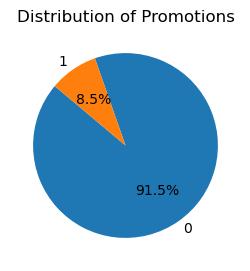

In [14]:
# Promotion number distribution

promoted_counts = df_train['is_promoted'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(promoted_counts, labels=promoted_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Promotions')

plt.show()

<AxesSubplot:>

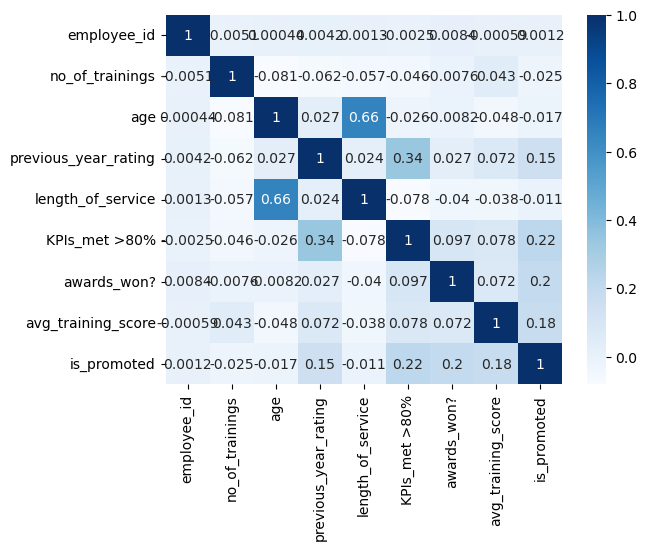

In [15]:
sns.heatmap(df_train.corr(), annot=True, cmap='Blues')

##### Avg training score, awards won, KPIs met and previous year rating are highly correlated to Promotion decision.

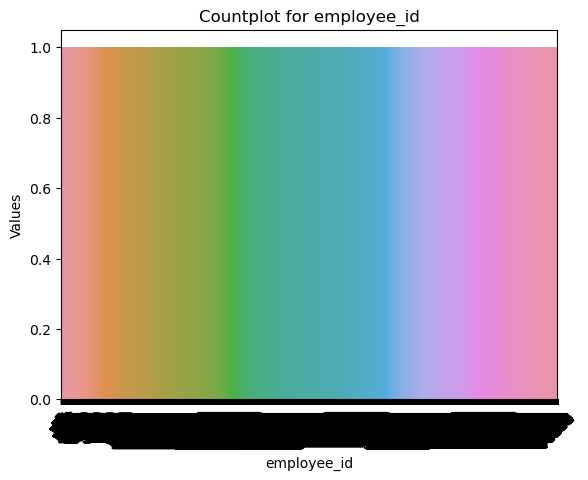

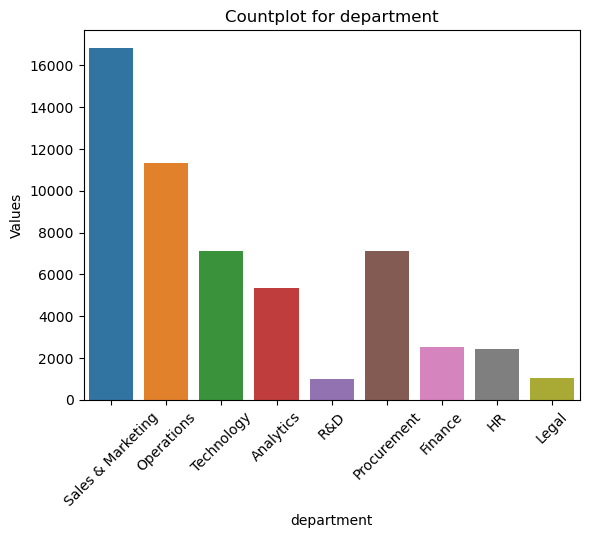

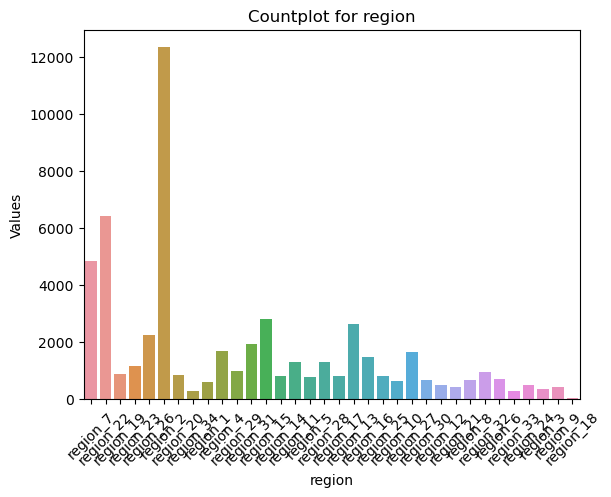

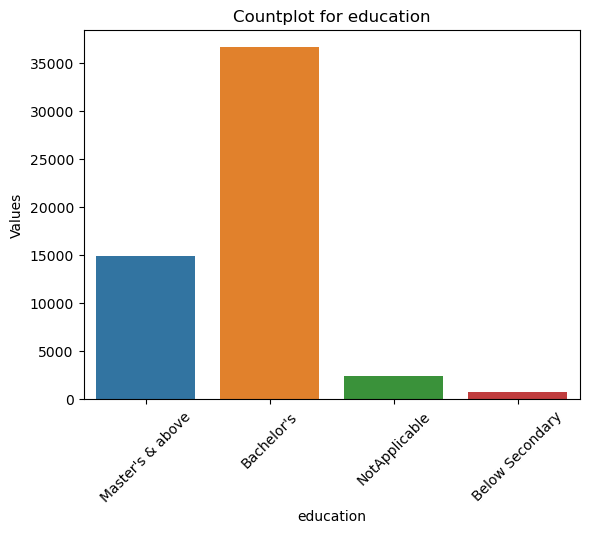

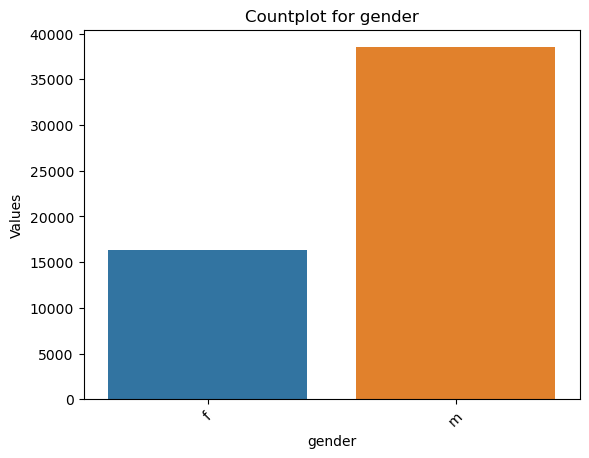

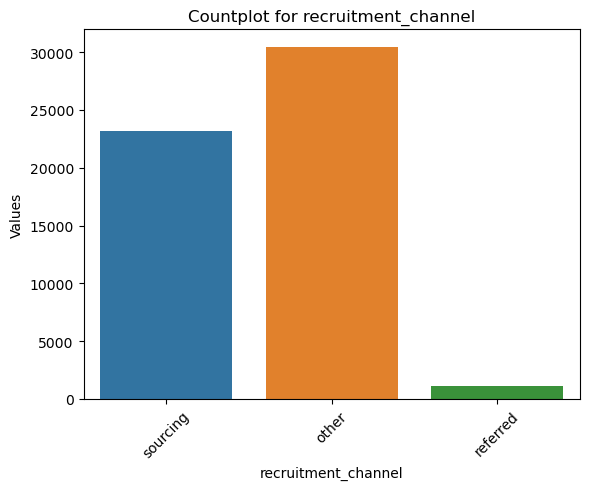

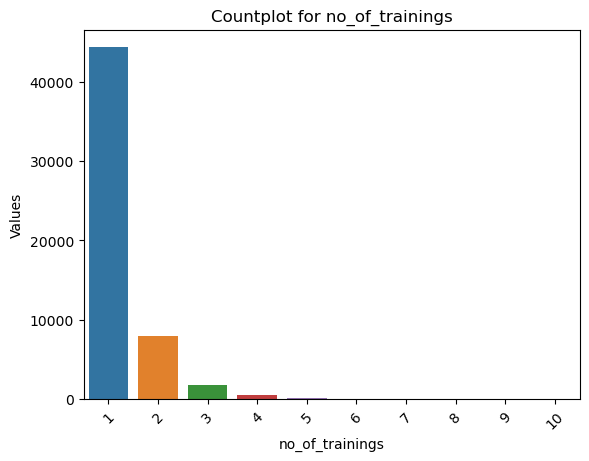

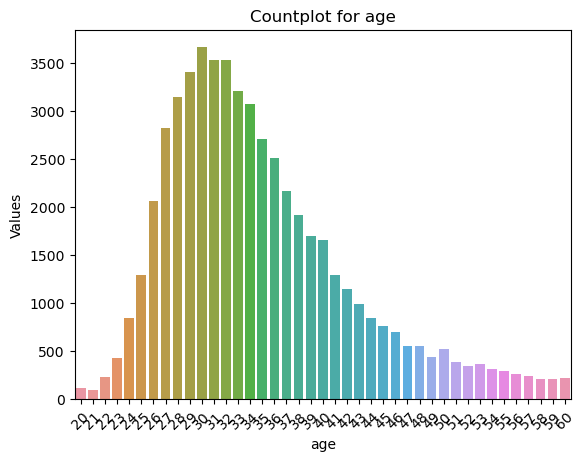

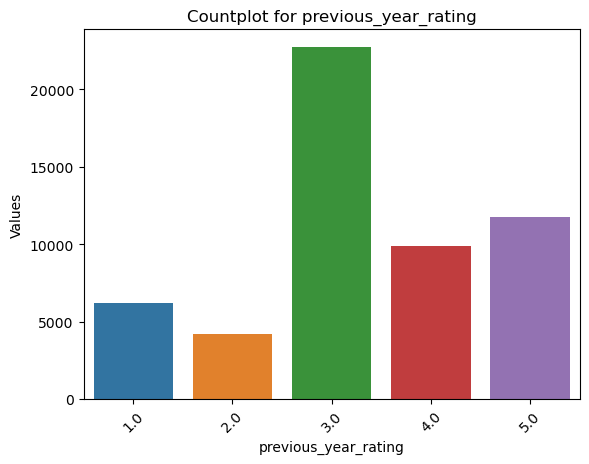

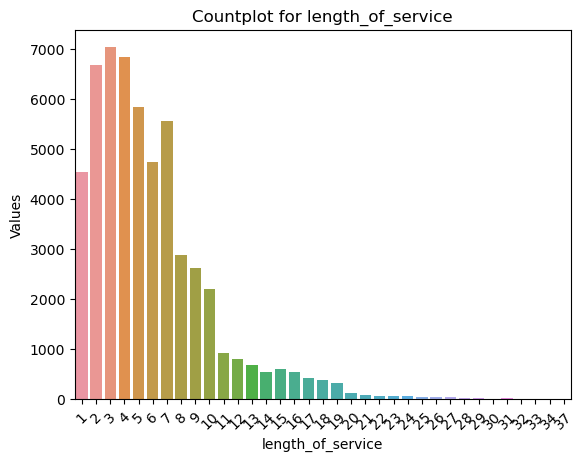

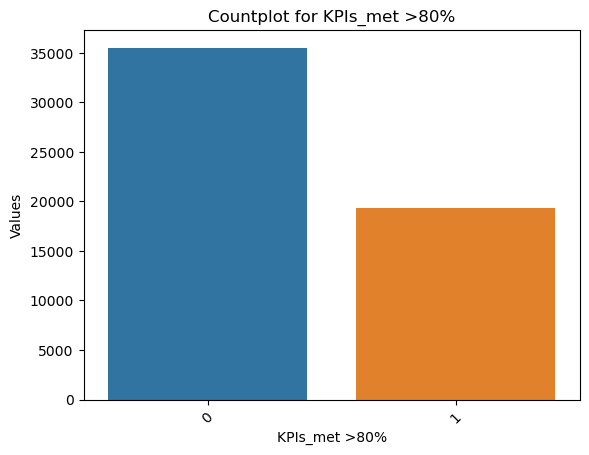

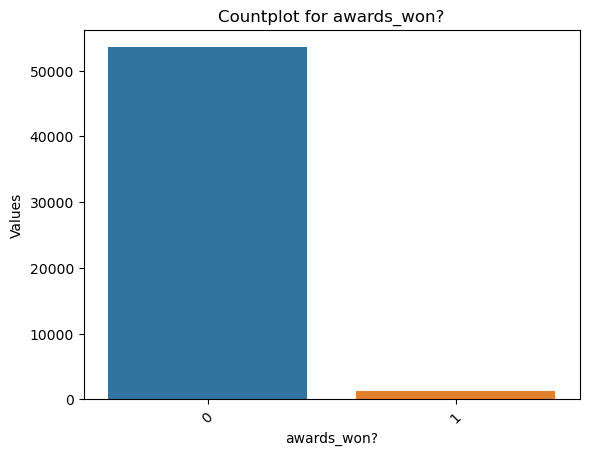

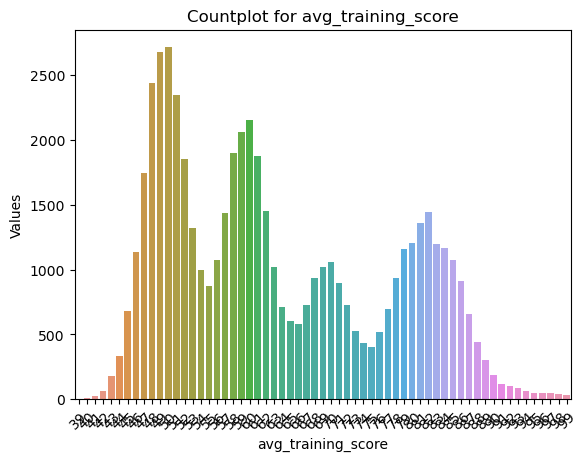

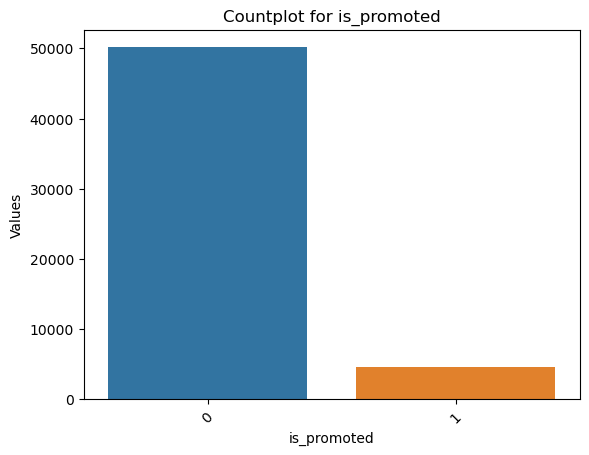

In [17]:
# Check the countplots

for col in df_train.columns:
    sns.countplot( data = df_train, x = col)

    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylabel('Values')
    plt.title(f'Countplot for {col}')
    plt.show()

### Feature engineering

In [18]:
# Create categories for age

#df_train['age_grp'] = pd.cut(x = df_train['age'], bins=[20, 29, 39, 49, 60], labels=['20', '30', '40','50'] )
#df_test['age_grp']  = pd.cut(x = df_test['age'], bins=[20, 29, 39, 49, 60], labels=['20', '30', '40','50'] )

In [19]:
# Create categories for age

#df_train['avg_train_score_grp'] = pd.cut(x = df_train['avg_training_score'], bins=[20, 29, 39, 49,59,69,79,89,99], labels=['20', '30', '40', '50','60','70','80','90'] )
#df_test['avg_train_score_grp']  = pd.cut(x = df_test['avg_training_score'], bins=[20, 29, 39, 49,59,69,79,89,99], labels=['20', '30', '40', '50', '60', '70', '80', '90'] )

In [20]:
# Age column is not required. Hence dropped.
#df_train.drop('age',axis=1, inplace=True)
#df_test.drop('age',axis=1, inplace=True)

In [21]:
# avg_training_score column is not required. Hence dropped.
#df_train.drop('avg_training_score', axis=1, inplace=True)
#df_test.drop('avg_training_score', axis=1, inplace=True)

In [22]:
#df_train['avg_train_score_grp'].nunique()

#### Data split

In [23]:
# Split train & test dataset into X_train (Predictors) and y_train (Target). Only employee ID is dropped.

X = df_train[[ 'department', 'region', 'education', 'gender', 
                 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 
                 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score' ]]

y = df_train['is_promoted']

X_unseen = df_test[[ 'department', 'region', 'education', 'gender', 
               'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 
               'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score' ]]

In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Data encoding : Convert the cateogorical columns into numerical ones using encoding techniques.

In [25]:
encoding_columns  = [ 'region', 'department', 'education', 'gender', 'recruitment_channel' ]

In [26]:
# Encoding training dataset
encoded_columns_df = pd.DataFrame()

for col in encoding_columns:
    encoded = pd.get_dummies(X_train[col], prefix=col)
    encoded_columns_df = pd.concat([encoded_columns_df, encoded], axis=1)

X_train_encoded = pd.concat([X_train, encoded_columns_df], axis=1)
X_train_encoded.drop(encoding_columns, axis=1, inplace=True)

In [27]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43846 entries, 3872 to 15795
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               43846 non-null  int64  
 1   age                           43846 non-null  int64  
 2   previous_year_rating          43846 non-null  float64
 3   length_of_service             43846 non-null  int64  
 4   KPIs_met >80%                 43846 non-null  int64  
 5   awards_won?                   43846 non-null  int64  
 6   avg_training_score            43846 non-null  int64  
 7   region_region_1               43846 non-null  uint8  
 8   region_region_10              43846 non-null  uint8  
 9   region_region_11              43846 non-null  uint8  
 10  region_region_12              43846 non-null  uint8  
 11  region_region_13              43846 non-null  uint8  
 12  region_region_14              43846 non-null  uint8  
 13

In [28]:
# Encoding testing dataset
encoded_columns_df = pd.DataFrame()

for col in encoding_columns:
    encoded = pd.get_dummies(X_test[col], prefix=col)
    encoded_columns_df = pd.concat([encoded_columns_df, encoded], axis=1)

X_test_encoded = pd.concat([X_test, encoded_columns_df], axis=1)
X_test_encoded.drop(encoding_columns, axis=1, inplace=True)

In [29]:
X_test_encoded.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,region_region_1,region_region_10,region_region_11,...,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,education_NotApplicable,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
40907,1,35,5.0,10,0,0,47,0,0,0,...,0,1,0,0,0,0,1,1,0,0
51939,3,33,1.0,4,0,0,51,0,0,0,...,0,1,0,0,0,0,1,1,0,0
6978,2,38,3.0,11,0,0,64,0,0,0,...,0,1,0,0,0,0,1,1,0,0
12814,1,33,1.0,8,0,0,56,0,0,0,...,0,1,0,0,0,1,0,1,0,0
22921,1,37,1.0,4,0,0,80,0,0,0,...,1,1,0,0,0,1,0,1,0,0


In [30]:
# Check the shape of training and testing dataset
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(43846, 59)
(10962, 59)


In [31]:
# Ensure no null values

pd.set_option('display.max_rows', 100)
X_test_encoded.isnull().sum()

no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
region_region_1                 0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_20                0
region_region_21                0
region_region_22                0
region_region_23                0
region_region_24                0
region_region_25                0
region_region_26                0
region_region_27                0
region_region_28                0
region_region_29                0
region_region_

#### Data Scaling 

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [33]:
# Convert the scaled arrays to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)

In [34]:
# SMOTE (Synthetic Minority Over-sampling Technique) to remove class imbalance.

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled_df, y_train)

### Model Building

#### Logistic Regression

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression()

In [37]:
# Fit the logistic regression model with all features
lrmodel.fit(X_train_scaled_df, y_train)

LogisticRegression()

In [38]:
# Make predictions with selected features
y_pred = lrmodel.predict(X_test_scaled_df)

In [39]:
# Performance metrics with all features

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'f1 score: {f1}')
print(f'Confusion matrix: {cm}')

Accuracy: 0.9326765188834154
Precision: 0.821969696969697
Recall: 0.23898678414096916
f1 score: 0.3703071672354949
Confusion matrix: [[10007    47]
 [  691   217]]


#### Logistic regression with RFE (Recurssive feature elimination)

In [40]:
lrmodel_selected = LogisticRegression()

In [41]:
# RFE

rfe = RFE(lrmodel_selected, n_features_to_select=10)
rfe.fit(X_train_scaled_df, y_train)
lr_selected_features = X_train_scaled_df.columns[rfe.support_]

In [42]:
print(lr_selected_features)

Index(['KPIs_met >80%', 'avg_training_score', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology'],
      dtype='object')


In [43]:
# Fit the logistic regression model with selected features
lrmodel_selected.fit(X_train_scaled_df[lr_selected_features], y_train)

LogisticRegression()

In [44]:
# Make predictions with selected features
y_pred_selected = lrmodel_selected.predict(X_test_scaled_df[lr_selected_features])

In [45]:
# Performance metrics with selected features

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_selected)

from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_selected)

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_selected)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_selected)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_selected)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'f1 score: {f1}')
print(f'Confusion matrix: {cm}')

Accuracy: 0.9326765188834154
Precision: 0.9207920792079208
Recall: 0.20484581497797358
f1 score: 0.33513513513513515
Confusion matrix: [[10038    16]
 [  722   186]]


##### Logistic regression with different thresholds

In [46]:
from sklearn.metrics import precision_recall_curve, f1_score

predicted_probabilities = lrmodel.predict_proba(X_test_scaled_df)[:, 1]

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_f1 = 0
optimal_threshold = 0
final_precision = 0
final_recall = 0

for threshold in thresholds:
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    precision = precision_score(y_test, predicted_labels)
    recall = recall_score(y_test, predicted_labels)
    f1 = f1_score(y_test, predicted_labels)

    if f1 > best_f1:
        best_f1 = f1
        optimal_threshold = threshold
        final_precision = precision
        final_recall = recall
print("Optimal Threshold:", optimal_threshold)
print("Best F1 Score:", best_f1)
print("Precision:", final_precision)
print("Recall:", final_recall)

Optimal Threshold: 0.3
Best F1 Score: 0.4529032258064516
Precision: 0.5467289719626168
Recall: 0.3865638766519824


#### XBBoost

In [47]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgbmodel = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Learning rate
    max_depth=3  # Maximum depth of trees
)

# Train the model
xgbmodel.fit(X_train_scaled_df, y_train)

# Make predictions
y_pred = xgbmodel.predict(X_test_scaled_df)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9369640576537128
Precision: 0.9428571428571428
Recall: 0.2544052863436123
F1 Score: 0.40069384215091064


##### XGBoost with hyperparameter tuning

In [48]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Initialize the XGBoost classifier
xgbmodel_h = xgb.XGBClassifier()

# Define a random grid of hyperparameters to search
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [0, 1, 2],
    'alpha': [0, 1, 2]
}

# Create a RandomizedSearchCV object with cross-validation
random_search = RandomizedSearchCV(estimator=xgbmodel_h, param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='f1', verbose=2, n_jobs=-1, random_state=42)

# Fit the random search to your training data
random_search.fit(X_train_scaled_df, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model from the random search
best_xgb_model = random_search.best_estimator_

# Evaluate the best model on your test data
y_pred = best_xgb_model.predict(X_test_scaled_df)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Best Model Performance on Test Data:')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.2, 'lambda': 1, 'gamma': 0, 'colsample_bytree': 1.0, 'alpha': 1}
Best Model Performance on Test Data:
Accuracy: 0.9429848567779602
Precision: 0.9327217125382263
Recall: 0.33590308370044053
F1 Score: 0.4939271255060728


##### XGBoost with selected hyperparameters & resampled dataset

In [49]:
# Initialize the XGBoost classifier with choosen hyperparameters

xgbmodel_r = xgb.XGBClassifier(
    n_estimators= 200,
    learning_rate= 0.2,
    max_depth= 3,
    min_child_weight= 3,
    subsample= 1.0,
    colsample_bytree= 1.0,
    gamma= 0,
    reg_lambda = 1,
    alpha= 1
)

# Train the model
xgbmodel_r.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = xgbmodel_r.predict(X_test_scaled_df)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9383324210910418
Precision: 0.8085106382978723
Recall: 0.33480176211453744
F1 Score: 0.47352024922118374


#### CatBoostClassifier

In [50]:
from catboost import CatBoostClassifier

# Initialize the CatBoost classifier
cbmodel = CatBoostClassifier(
    iterations=100,  # Number of trees (formerly n_estimators)
    learning_rate=0.1,  # Learning rate
    depth=3  # Maximum depth of trees (formerly max_depth)
)

# Train the model
cbmodel.fit(X_train_scaled_df, y_train)

# Make predictions
y_pred = cbmodel.predict(X_test_scaled_df)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.5806834	total: 158ms	remaining: 15.7s
1:	learn: 0.4987729	total: 177ms	remaining: 8.65s
2:	learn: 0.4384884	total: 194ms	remaining: 6.27s
3:	learn: 0.3980473	total: 210ms	remaining: 5.05s
4:	learn: 0.3571614	total: 226ms	remaining: 4.29s
5:	learn: 0.3327588	total: 242ms	remaining: 3.79s
6:	learn: 0.3133036	total: 259ms	remaining: 3.44s
7:	learn: 0.2996097	total: 272ms	remaining: 3.13s
8:	learn: 0.2844936	total: 288ms	remaining: 2.91s
9:	learn: 0.2756511	total: 303ms	remaining: 2.73s
10:	learn: 0.2678387	total: 318ms	remaining: 2.58s
11:	learn: 0.2597295	total: 335ms	remaining: 2.46s
12:	learn: 0.2520194	total: 348ms	remaining: 2.33s
13:	learn: 0.2418366	total: 365ms	remaining: 2.24s
14:	learn: 0.2390151	total: 377ms	remaining: 2.13s
15:	learn: 0.2372513	total: 390ms	remaining: 2.05s
16:	learn: 0.2350642	total: 404ms	remaining: 1.97s
17:	learn: 0.2320531	total: 421ms	remaining: 1.92s
18:	learn: 0.2303871	total: 433ms	remaining: 1.84s
19:	learn: 0.2282155	total: 450ms	remaini

#### catboost with randomized search

In [51]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Initialize the CatBoost classifier
cbmodel = CatBoostClassifier()

# Define a random grid of hyperparameters to search
param_dist = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 4, 5],
    'l2_leaf_reg': uniform(0, 10),  # Example of a continuous parameter
    'border_count': [32, 64, 128],
}

# Create a RandomizedSearchCV object with cross-validation
random_search_cb = RandomizedSearchCV(estimator=cbmodel, param_distributions=param_dist,
                                      n_iter=10, cv=5, scoring='f1', verbose=2, n_jobs=-1, random_state=42)

# Fit the random search to your training data
random_search_cb.fit(X_train_scaled_df, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search_cb.best_params_)

# Get the best model from the random search
best_cb_model = random_search_cb.best_estimator_

# Evaluate the best model on your test data
y_pred_cb = best_cb_model.predict(X_test_scaled_df)
accuracy_cb = accuracy_score(y_test, y_pred_cb)
precision_cb = precision_score(y_test, y_pred_cb)
recall_cb = recall_score(y_test, y_pred_cb)
f1_cb = f1_score(y_test, y_pred_cb)

print('Best CatBoost Model Performance on Test Data:')
print("Accuracy:", accuracy_cb)
print("Precision:", precision_cb)
print("Recall:", recall_cb)
print("F1 Score:", f1_cb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.4889747	total: 14.9ms	remaining: 4.45s
1:	learn: 0.3807221	total: 31.5ms	remaining: 4.69s
2:	learn: 0.3226518	total: 48.2ms	remaining: 4.77s
3:	learn: 0.2824883	total: 63.3ms	remaining: 4.68s
4:	learn: 0.2654110	total: 77.6ms	remaining: 4.58s
5:	learn: 0.2473338	total: 92.3ms	remaining: 4.52s
6:	learn: 0.2293513	total: 108ms	remaining: 4.52s
7:	learn: 0.2193609	total: 125ms	remaining: 4.58s
8:	learn: 0.2153691	total: 141ms	remaining: 4.55s
9:	learn: 0.2065538	total: 156ms	remaining: 4.53s
10:	learn: 0.2055209	total: 173ms	remaining: 4.55s
11:	learn: 0.2038883	total: 188ms	remaining: 4.52s
12:	learn: 0.1995428	total: 205ms	remaining: 4.53s
13:	learn: 0.1939301	total: 222ms	remaining: 4.53s
14:	learn: 0.1931832	total: 238ms	remaining: 4.52s
15:	learn: 0.1920067	total: 253ms	remaining: 4.5s
16:	learn: 0.1916362	total: 268ms	remaining: 4.46s
17:	learn: 0.1894913	total: 284ms	remaining: 4.45s
18:	learn: 0.1891360	total

170:	learn: 0.1538181	total: 2.49s	remaining: 1.88s
171:	learn: 0.1537973	total: 2.51s	remaining: 1.86s
172:	learn: 0.1537345	total: 2.52s	remaining: 1.85s
173:	learn: 0.1536665	total: 2.53s	remaining: 1.83s
174:	learn: 0.1536001	total: 2.54s	remaining: 1.81s
175:	learn: 0.1535187	total: 2.55s	remaining: 1.8s
176:	learn: 0.1534737	total: 2.56s	remaining: 1.78s
177:	learn: 0.1533962	total: 2.58s	remaining: 1.76s
178:	learn: 0.1532286	total: 2.59s	remaining: 1.75s
179:	learn: 0.1530232	total: 2.6s	remaining: 1.73s
180:	learn: 0.1529205	total: 2.61s	remaining: 1.72s
181:	learn: 0.1528870	total: 2.62s	remaining: 1.7s
182:	learn: 0.1528237	total: 2.63s	remaining: 1.68s
183:	learn: 0.1527785	total: 2.65s	remaining: 1.67s
184:	learn: 0.1526999	total: 2.66s	remaining: 1.65s
185:	learn: 0.1526392	total: 2.68s	remaining: 1.64s
186:	learn: 0.1525322	total: 2.7s	remaining: 1.63s
187:	learn: 0.1524773	total: 2.72s	remaining: 1.62s
188:	learn: 0.1524142	total: 2.73s	remaining: 1.6s
189:	learn: 0.152

In [52]:
#### catboost with randomized search parameters and resampled data

In [53]:
from catboost import CatBoostClassifier

# Initialize the CatBoost classifier
cbmodel_r = CatBoostClassifier(
    border_count = 64,
    l2_leaf_reg = 6.183860093330873,
    iterations=300,
    learning_rate=0.2,
    depth=4  
)

# Train the model
cbmodel_r.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = cbmodel_r.predict(X_test_scaled_df)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0:	learn: 0.5876927	total: 32ms	remaining: 9.56s
1:	learn: 0.5192548	total: 60.4ms	remaining: 9s
2:	learn: 0.4616247	total: 89.3ms	remaining: 8.84s
3:	learn: 0.4268665	total: 115ms	remaining: 8.5s
4:	learn: 0.3917490	total: 142ms	remaining: 8.35s
5:	learn: 0.3631253	total: 170ms	remaining: 8.32s
6:	learn: 0.3506004	total: 195ms	remaining: 8.15s
7:	learn: 0.3437600	total: 217ms	remaining: 7.9s
8:	learn: 0.3198214	total: 247ms	remaining: 7.98s
9:	learn: 0.2943384	total: 281ms	remaining: 8.14s
10:	learn: 0.2743618	total: 310ms	remaining: 8.14s
11:	learn: 0.2706356	total: 333ms	remaining: 8s
12:	learn: 0.2597995	total: 359ms	remaining: 7.93s
13:	learn: 0.2505514	total: 385ms	remaining: 7.86s
14:	learn: 0.2430546	total: 410ms	remaining: 7.78s
15:	learn: 0.2389179	total: 435ms	remaining: 7.72s
16:	learn: 0.2341692	total: 461ms	remaining: 7.68s
17:	learn: 0.2316780	total: 490ms	remaining: 7.67s
18:	learn: 0.2298461	total: 512ms	remaining: 7.57s
19:	learn: 0.2280595	total: 536ms	remaining: 7.5

161:	learn: 0.1057938	total: 7.18s	remaining: 6.12s
162:	learn: 0.1057247	total: 7.21s	remaining: 6.05s
163:	learn: 0.1056728	total: 7.23s	remaining: 5.99s
164:	learn: 0.1054904	total: 7.26s	remaining: 5.94s
165:	learn: 0.1052069	total: 7.29s	remaining: 5.88s
166:	learn: 0.1047263	total: 7.31s	remaining: 5.82s
167:	learn: 0.1043941	total: 7.34s	remaining: 5.76s
168:	learn: 0.1043109	total: 7.36s	remaining: 5.71s
169:	learn: 0.1041869	total: 7.39s	remaining: 5.65s
170:	learn: 0.1039228	total: 7.41s	remaining: 5.59s
171:	learn: 0.1036959	total: 7.44s	remaining: 5.53s
172:	learn: 0.1036344	total: 7.46s	remaining: 5.48s
173:	learn: 0.1035724	total: 7.49s	remaining: 5.42s
174:	learn: 0.1035116	total: 7.51s	remaining: 5.36s
175:	learn: 0.1034728	total: 7.54s	remaining: 5.31s
176:	learn: 0.1034216	total: 7.56s	remaining: 5.25s
177:	learn: 0.1032282	total: 7.58s	remaining: 5.2s
178:	learn: 0.1031726	total: 7.61s	remaining: 5.14s
179:	learn: 0.1031073	total: 7.63s	remaining: 5.09s
180:	learn: 0

#### LightGBM

In [54]:
import lightgbm as lgb

lgbmodel = lgb.LGBMClassifier(
    boosting_type='gbdt',  # Gradient Boosting Decision Tree
    n_estimators=100,      # Number of boosting rounds (trees)
    learning_rate=0.1,     # Step size to update the model
    max_depth=5,           # Maximum depth of trees
    objective='binary',    # Binary classification task
    metric='binary_logloss',  # Metric to optimize (logloss for binary classification)
    num_leaves=32
)

# Train the model
lgbmodel.fit(X_train_scaled_df, y_train)

# Make predictions
y_pred = lgbmodel.predict(X_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3760, number of negative: 40086
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 43846, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085755 -> initscore=-2.366608
[LightGBM] [Info] Start training from score -2.366608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

#### Lightgbm with randomized search CV

In [55]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Initialize the LightGBM classifier
lgbmodel = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss')

# Define a parameter grid for random search
param_dist = {
    'n_estimators': sp_randint(50, 200),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': sp_randint(3, 15),
    'num_leaves': sp_randint(20, 50),
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create a RandomizedSearchCV object with cross-validation
random_search = RandomizedSearchCV(
    estimator=lgbmodel, 
    param_distributions=param_dist,
    n_iter=10,  
    cv=5,  
    scoring='f1',  
    verbose=2, 
    n_jobs=-1,  
    random_state=42 
)


random_search.fit(X_train_scaled_df, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model from the random search
best_lgb_model = random_search.best_estimator_

# Evaluate the best model on your test data
y_pred = best_lgb_model.predict(X_test_scaled_df)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Best Model Performance on Test Data:')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3760, number of negative: 40086
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 43846, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085755 -> initscore=-2.366608
[LightGBM] [Info] Start training from score -2.366608
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 13, 'n_estimators': 121, 'num_leaves': 48, 'subsample': 0.8}
Best Model Performance on Test Data:
Accuracy: 0.943258529465426
Precision: 0.8928571428571429
Recall: 0.3579295154185022
F1 Score: 0.5110062893081762


#### LightLGB with selected hyperparameters and resampled data

In [56]:
import lightgbm as lgb

lgbmodel_r = lgb.LGBMClassifier(
    boosting_type='gbdt',  # Gradient Boosting Decision Tree
    n_estimators=121,      # Number of boosting rounds (trees)
    learning_rate=0.2,     # Step size to update the model
    max_depth=13,           # Maximum depth of trees
    objective='binary',    # Binary classification task
    metric='binary_logloss',  # Metric to optimize (logloss for binary classification)
    num_leaves=48,
    colsample_bytree = 1.0,
    subsample = 0.8
)

# Train the model
lgbmodel_r.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = lgbmodel_r.predict(X_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 40086, number of negative: 40086
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12372
[LightGBM] [Info] Number of data points in the train set: 80172, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.9405218025907681
Precision: 0.82
Recall: 0.36123348017621143
F1 Score: 0.5015290519877675


#### RandomForest

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled_df, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Scores with RandomForest - all features')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Scores with RandomForest - all features
Accuracy: 0.9319467250501733
Precision: 0.9655172413793104
Recall: 0.18502202643171806
F1 Score: 0.3105360443622921


#### RandomForest with randomized search CV

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='f1', random_state=42)

# Fit the model to the training data
random_search.fit(X_train_scaled_df, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model from the search
best_rf_model = random_search.best_estimator_

# Make predictions
y_pred = best_rf_model.predict(X_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Scores with RandomForest - Hyperparameter Tuning')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Scores with RandomForest - Hyperparameter Tuning
Accuracy: 0.934592227695676
Precision: 0.7690140845070422
Recall: 0.30066079295154186
F1 Score: 0.4323040380047506


#### RandomForest with selected hyperparameters and resampled dataset

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier_r = RandomForestClassifier(n_estimators=50, min_samples_split = 5, min_samples_leaf=1, random_state=42)

# Train the model
rf_classifier_r.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_classifier_r.predict(X_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Scores with RandomForest - all features')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Scores with RandomForest - all features
Accuracy: 0.9244663382594417
Precision: 0.5689655172413793
Recall: 0.3634361233480176
F1 Score: 0.44354838709677424


#### Ensemble VotingClassifier to choose the best model

In [61]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Create a list of (model_name, model_instance) tuples
models = [
    ('LogisticRegression', lrmodel),
    ('LogisticRegression_s', lrmodel_selected),
    ('XGBoost', xgbmodel),
    ('CatBoost', cbmodel),
    ('LightGBM', lgbmodel),
    ('RandomForest', rf_classifier),
    ('RandomForest_b', best_rf_model),
    ('RandomForest_r', rf_classifier_r),
    ('XGBoost_b', best_xgb_model),
    ('XGBoost_r', xgbmodel_r),
    ('CatBoost_b', best_cb_model),
    ('CatBoost_r', cbmodel_r),
    ('LightGBM_b', best_lgb_model),
    ('LightGBM_r', lgbmodel_r)   
]

# Create a voting ensemble
ensemble = VotingClassifier(estimators=models, voting='soft')  # 'soft' for probability-based voting
ensemble.fit(X_train_scaled_df, y_train)
y_pred_ensemble = ensemble.predict(X_test_scaled_df)
f1_ensemble = f1_score(y_test, y_pred_ensemble)

Learning rate set to 0.051765
0:	learn: 0.6322726	total: 13.4ms	remaining: 13.4s
1:	learn: 0.5816671	total: 31.7ms	remaining: 15.8s
2:	learn: 0.5318180	total: 45.3ms	remaining: 15.1s
3:	learn: 0.4940323	total: 61.2ms	remaining: 15.2s
4:	learn: 0.4641120	total: 81.8ms	remaining: 16.3s
5:	learn: 0.4376237	total: 98.2ms	remaining: 16.3s
6:	learn: 0.4138639	total: 116ms	remaining: 16.5s
7:	learn: 0.3817659	total: 134ms	remaining: 16.6s
8:	learn: 0.3618209	total: 163ms	remaining: 17.9s
9:	learn: 0.3459902	total: 179ms	remaining: 17.7s
10:	learn: 0.3323671	total: 202ms	remaining: 18.2s
11:	learn: 0.3197146	total: 226ms	remaining: 18.6s
12:	learn: 0.3069930	total: 242ms	remaining: 18.4s
13:	learn: 0.2981500	total: 253ms	remaining: 17.8s
14:	learn: 0.2817293	total: 265ms	remaining: 17.4s
15:	learn: 0.2714317	total: 276ms	remaining: 17s
16:	learn: 0.2643264	total: 288ms	remaining: 16.6s
17:	learn: 0.2579528	total: 298ms	remaining: 16.3s
18:	learn: 0.2538037	total: 310ms	remaining: 16s
19:	learn

167:	learn: 0.1619532	total: 2.47s	remaining: 12.2s
168:	learn: 0.1618922	total: 2.49s	remaining: 12.3s
169:	learn: 0.1616901	total: 2.51s	remaining: 12.2s
170:	learn: 0.1614845	total: 2.52s	remaining: 12.2s
171:	learn: 0.1614221	total: 2.54s	remaining: 12.2s
172:	learn: 0.1613712	total: 2.55s	remaining: 12.2s
173:	learn: 0.1613242	total: 2.57s	remaining: 12.2s
174:	learn: 0.1611654	total: 2.59s	remaining: 12.2s
175:	learn: 0.1611071	total: 2.6s	remaining: 12.2s
176:	learn: 0.1610663	total: 2.62s	remaining: 12.2s
177:	learn: 0.1609344	total: 2.63s	remaining: 12.2s
178:	learn: 0.1608148	total: 2.65s	remaining: 12.1s
179:	learn: 0.1607269	total: 2.66s	remaining: 12.1s
180:	learn: 0.1605947	total: 2.68s	remaining: 12.1s
181:	learn: 0.1605504	total: 2.69s	remaining: 12.1s
182:	learn: 0.1604927	total: 2.71s	remaining: 12.1s
183:	learn: 0.1604771	total: 2.72s	remaining: 12.1s
184:	learn: 0.1603781	total: 2.74s	remaining: 12.1s
185:	learn: 0.1603307	total: 2.75s	remaining: 12s
186:	learn: 0.1

339:	learn: 0.1505648	total: 5s	remaining: 9.7s
340:	learn: 0.1505059	total: 5.02s	remaining: 9.7s
341:	learn: 0.1504756	total: 5.03s	remaining: 9.68s
342:	learn: 0.1504362	total: 5.05s	remaining: 9.67s
343:	learn: 0.1504091	total: 5.06s	remaining: 9.65s
344:	learn: 0.1503619	total: 5.08s	remaining: 9.64s
345:	learn: 0.1503332	total: 5.09s	remaining: 9.62s
346:	learn: 0.1502477	total: 5.11s	remaining: 9.61s
347:	learn: 0.1501903	total: 5.12s	remaining: 9.59s
348:	learn: 0.1501669	total: 5.13s	remaining: 9.58s
349:	learn: 0.1501197	total: 5.15s	remaining: 9.56s
350:	learn: 0.1500988	total: 5.17s	remaining: 9.55s
351:	learn: 0.1500568	total: 5.18s	remaining: 9.53s
352:	learn: 0.1500280	total: 5.2s	remaining: 9.52s
353:	learn: 0.1499865	total: 5.21s	remaining: 9.51s
354:	learn: 0.1499312	total: 5.23s	remaining: 9.5s
355:	learn: 0.1499000	total: 5.25s	remaining: 9.49s
356:	learn: 0.1498465	total: 5.26s	remaining: 9.48s
357:	learn: 0.1498083	total: 5.28s	remaining: 9.46s
358:	learn: 0.14977

504:	learn: 0.1441769	total: 7.53s	remaining: 7.38s
505:	learn: 0.1440722	total: 7.55s	remaining: 7.38s
506:	learn: 0.1440341	total: 7.57s	remaining: 7.37s
507:	learn: 0.1439933	total: 7.59s	remaining: 7.35s
508:	learn: 0.1439224	total: 7.61s	remaining: 7.34s
509:	learn: 0.1438879	total: 7.63s	remaining: 7.33s
510:	learn: 0.1438691	total: 7.64s	remaining: 7.32s
511:	learn: 0.1438245	total: 7.66s	remaining: 7.3s
512:	learn: 0.1437978	total: 7.68s	remaining: 7.29s
513:	learn: 0.1437655	total: 7.69s	remaining: 7.27s
514:	learn: 0.1437240	total: 7.71s	remaining: 7.26s
515:	learn: 0.1436992	total: 7.72s	remaining: 7.24s
516:	learn: 0.1436673	total: 7.74s	remaining: 7.23s
517:	learn: 0.1436189	total: 7.75s	remaining: 7.22s
518:	learn: 0.1435557	total: 7.77s	remaining: 7.21s
519:	learn: 0.1435344	total: 7.79s	remaining: 7.19s
520:	learn: 0.1435128	total: 7.81s	remaining: 7.18s
521:	learn: 0.1434552	total: 7.82s	remaining: 7.16s
522:	learn: 0.1434410	total: 7.84s	remaining: 7.15s
523:	learn: 0

667:	learn: 0.1387677	total: 10.3s	remaining: 5.1s
668:	learn: 0.1387325	total: 10.3s	remaining: 5.09s
669:	learn: 0.1387200	total: 10.3s	remaining: 5.07s
670:	learn: 0.1386713	total: 10.3s	remaining: 5.06s
671:	learn: 0.1386446	total: 10.3s	remaining: 5.04s
672:	learn: 0.1385950	total: 10.3s	remaining: 5.03s
673:	learn: 0.1385764	total: 10.4s	remaining: 5.01s
674:	learn: 0.1385670	total: 10.4s	remaining: 4.99s
675:	learn: 0.1385188	total: 10.4s	remaining: 4.97s
676:	learn: 0.1385021	total: 10.4s	remaining: 4.96s
677:	learn: 0.1384490	total: 10.4s	remaining: 4.94s
678:	learn: 0.1384114	total: 10.4s	remaining: 4.92s
679:	learn: 0.1383871	total: 10.4s	remaining: 4.9s
680:	learn: 0.1383573	total: 10.4s	remaining: 4.89s
681:	learn: 0.1383365	total: 10.4s	remaining: 4.87s
682:	learn: 0.1383150	total: 10.5s	remaining: 4.85s
683:	learn: 0.1382713	total: 10.5s	remaining: 4.84s
684:	learn: 0.1382455	total: 10.5s	remaining: 4.82s
685:	learn: 0.1382032	total: 10.5s	remaining: 4.8s
686:	learn: 0.1

829:	learn: 0.1343253	total: 14.6s	remaining: 3s
830:	learn: 0.1342919	total: 14.7s	remaining: 2.98s
831:	learn: 0.1342624	total: 14.7s	remaining: 2.96s
832:	learn: 0.1342200	total: 14.7s	remaining: 2.95s
833:	learn: 0.1341917	total: 14.7s	remaining: 2.93s
834:	learn: 0.1341626	total: 14.8s	remaining: 2.92s
835:	learn: 0.1341331	total: 14.8s	remaining: 2.9s
836:	learn: 0.1341236	total: 14.8s	remaining: 2.88s
837:	learn: 0.1341063	total: 14.8s	remaining: 2.87s
838:	learn: 0.1340759	total: 14.9s	remaining: 2.85s
839:	learn: 0.1340280	total: 14.9s	remaining: 2.83s
840:	learn: 0.1340065	total: 14.9s	remaining: 2.82s
841:	learn: 0.1339742	total: 14.9s	remaining: 2.8s
842:	learn: 0.1339427	total: 14.9s	remaining: 2.78s
843:	learn: 0.1339285	total: 15s	remaining: 2.76s
844:	learn: 0.1339132	total: 15s	remaining: 2.75s
845:	learn: 0.1338776	total: 15s	remaining: 2.73s
846:	learn: 0.1338545	total: 15s	remaining: 2.71s
847:	learn: 0.1338285	total: 15s	remaining: 2.69s
848:	learn: 0.1338036	total

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3760, number of negative: 40086
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 43846, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085755 -> initscore=-2.366608
[LightGBM] [Info] Start training from score -2.366608
0:	learn: 0.4889747	total: 9.95ms	remaining: 2.98s
1:	learn: 0.3807221	total: 20.1ms	remaining: 3s
2:	learn: 0.3226518	total: 30.6ms	remaining: 3.03s
3:	learn: 0.2824883	total: 41.1ms	remaining: 3.04s
4:	learn: 0.2654110	total: 51.7ms	remaining: 3.05s
5:	learn: 0.2473338	total: 62.5ms	remaining: 3.06s
6:	learn: 0.2293513	total: 72.7ms	remaining: 3.04s
7:	learn: 

148:	learn: 0.1551917	total: 4.05s	remaining: 4.11s
149:	learn: 0.1551012	total: 4.12s	remaining: 4.12s
150:	learn: 0.1550569	total: 4.13s	remaining: 4.07s
151:	learn: 0.1549698	total: 4.14s	remaining: 4.03s
152:	learn: 0.1548879	total: 4.14s	remaining: 3.98s
153:	learn: 0.1548313	total: 4.15s	remaining: 3.94s
154:	learn: 0.1547778	total: 4.16s	remaining: 3.89s
155:	learn: 0.1547044	total: 4.17s	remaining: 3.85s
156:	learn: 0.1546471	total: 4.18s	remaining: 3.81s
157:	learn: 0.1545935	total: 4.19s	remaining: 3.76s
158:	learn: 0.1545317	total: 4.2s	remaining: 3.72s
159:	learn: 0.1544735	total: 4.21s	remaining: 3.68s
160:	learn: 0.1544306	total: 4.21s	remaining: 3.64s
161:	learn: 0.1543886	total: 4.22s	remaining: 3.6s
162:	learn: 0.1543116	total: 4.23s	remaining: 3.56s
163:	learn: 0.1542216	total: 4.24s	remaining: 3.52s
164:	learn: 0.1541497	total: 4.25s	remaining: 3.48s
165:	learn: 0.1540776	total: 4.26s	remaining: 3.44s
166:	learn: 0.1540241	total: 4.27s	remaining: 3.4s
167:	learn: 0.1

7:	learn: 0.2193609	total: 85.1ms	remaining: 3.1s
8:	learn: 0.2153691	total: 101ms	remaining: 3.28s
9:	learn: 0.2065538	total: 112ms	remaining: 3.24s
10:	learn: 0.2055209	total: 123ms	remaining: 3.24s
11:	learn: 0.2038883	total: 133ms	remaining: 3.2s
12:	learn: 0.1995428	total: 144ms	remaining: 3.17s
13:	learn: 0.1939301	total: 153ms	remaining: 3.12s
14:	learn: 0.1931832	total: 162ms	remaining: 3.09s
15:	learn: 0.1920067	total: 172ms	remaining: 3.05s
16:	learn: 0.1916362	total: 182ms	remaining: 3.04s
17:	learn: 0.1894913	total: 193ms	remaining: 3.03s
18:	learn: 0.1891360	total: 203ms	remaining: 3s
19:	learn: 0.1885765	total: 214ms	remaining: 3s
20:	learn: 0.1861364	total: 225ms	remaining: 2.99s
21:	learn: 0.1853143	total: 235ms	remaining: 2.98s
22:	learn: 0.1837103	total: 246ms	remaining: 2.96s
23:	learn: 0.1816950	total: 256ms	remaining: 2.94s
24:	learn: 0.1793643	total: 266ms	remaining: 2.93s
25:	learn: 0.1773386	total: 277ms	remaining: 2.92s
26:	learn: 0.1770351	total: 290ms	remaini

167:	learn: 0.1540187	total: 1.93s	remaining: 1.52s
168:	learn: 0.1539679	total: 1.95s	remaining: 1.51s
169:	learn: 0.1538939	total: 1.96s	remaining: 1.5s
170:	learn: 0.1538181	total: 1.97s	remaining: 1.49s
171:	learn: 0.1537973	total: 1.99s	remaining: 1.48s
172:	learn: 0.1537345	total: 2s	remaining: 1.47s
173:	learn: 0.1536665	total: 2.01s	remaining: 1.45s
174:	learn: 0.1536001	total: 2.02s	remaining: 1.44s
175:	learn: 0.1535187	total: 2.03s	remaining: 1.43s
176:	learn: 0.1534737	total: 2.04s	remaining: 1.42s
177:	learn: 0.1533962	total: 2.05s	remaining: 1.41s
178:	learn: 0.1532286	total: 2.06s	remaining: 1.4s
179:	learn: 0.1530232	total: 2.08s	remaining: 1.38s
180:	learn: 0.1529205	total: 2.09s	remaining: 1.37s
181:	learn: 0.1528870	total: 2.1s	remaining: 1.36s
182:	learn: 0.1528237	total: 2.11s	remaining: 1.35s
183:	learn: 0.1527785	total: 2.12s	remaining: 1.34s
184:	learn: 0.1526999	total: 2.13s	remaining: 1.33s
185:	learn: 0.1526392	total: 2.15s	remaining: 1.32s
186:	learn: 0.1525

In [62]:
print(f1_ensemble)

0.5020308692120228


### Conclusion: The model LightGBM with hyperparameter tuning has given the best f1 score of 0.51
Below are the features importance of this model.

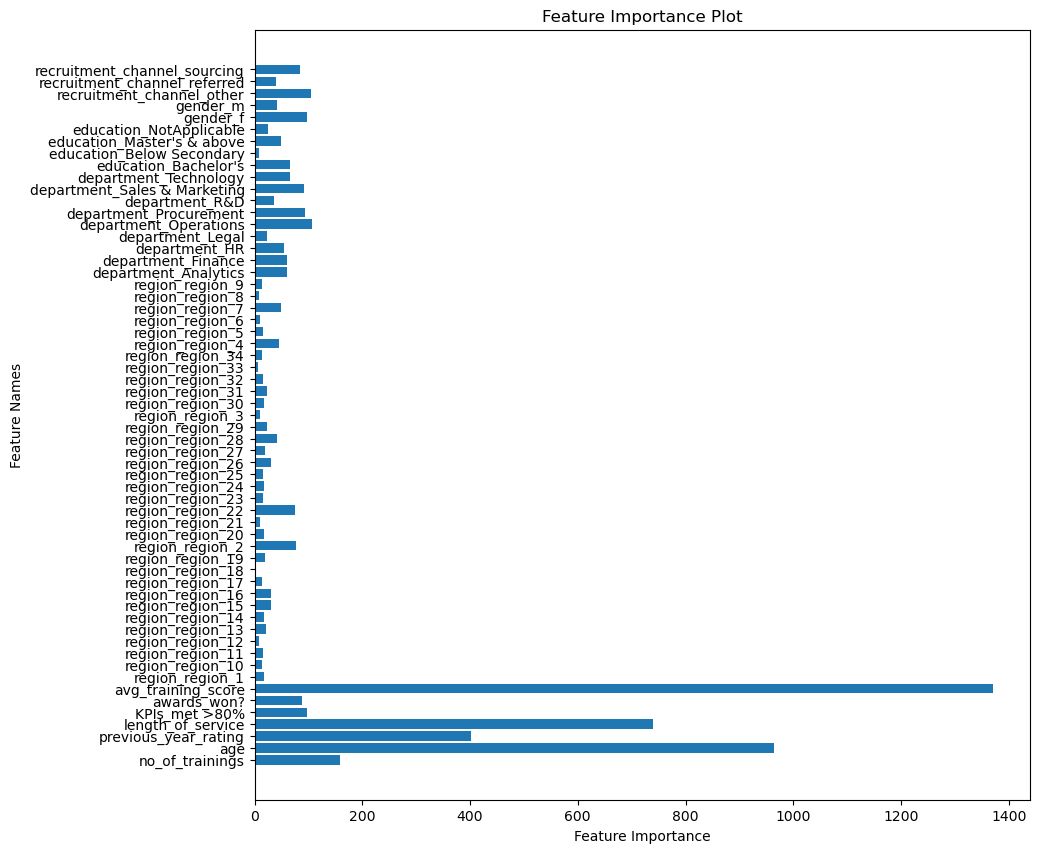

In [63]:
import matplotlib.pyplot as plt

feature_importance = best_lgb_model.feature_importances_
feature_names = X_train_scaled_df.columns

plt.figure(figsize=(10, 10))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Plot')
plt.show()

In [64]:
from sklearn.metrics import confusion_matrix

# Assuming you have X_test_scaled_df and y_test
y_pred_lgb = best_lgb_model.predict(X_test_scaled_df)

# Get the confusion matrix
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)

print("Confusion Matrix for LightGBM:")
print(conf_matrix_lgb)


Confusion Matrix for LightGBM:
[[10015    39]
 [  583   325]]


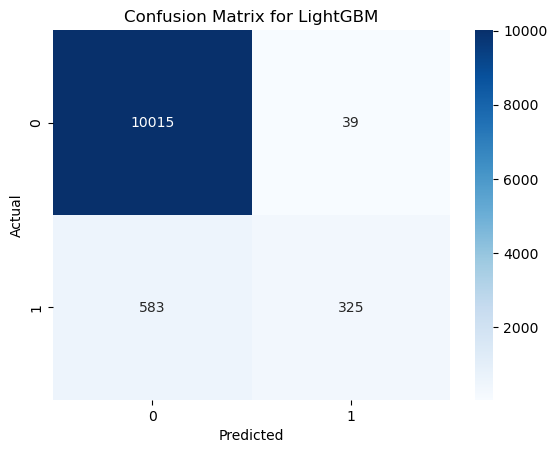

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the confusion matrix
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LightGBM')
plt.show()


In [67]:

y_pred_lgb = best_lgb_model.predict(X_test_scaled_df)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lgb)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_lgb)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_lgb)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_lgb)
print("F1 Score:", f1)


Accuracy: 0.943258529465426
Precision: 0.8928571428571429
Recall: 0.3579295154185022
F1 Score: 0.5110062893081762
